# A bunch of code that makes plots from the SeF6 paper, mostly from hard coded / digitized data

In [1]:
import numpy
import matplotlib
import pylab
%matplotlib inline

In [2]:
pylab.rc('font', family='serif', size=14)


# Isotopes plot

In [3]:
Names=[r'$^{48}$Ca',r'$^{76}$Ge',r'$^{96}$Zr',r'$^{110}$Pd',r'$^{116}$Cd',r'$^{124}$Sn',r'$^{136}$Xe',r'$^{150}$Nd']
QVals=[4273,2039,3347,2004,2809,2287,2461,3367]
NatAb=[0.187,7.8,2.8,11.8,7.6,5.6,8.9,5.6]

SeQVal=2995
SeNatAb=9.2

MoQVal=3035
MoNatAb=9.6

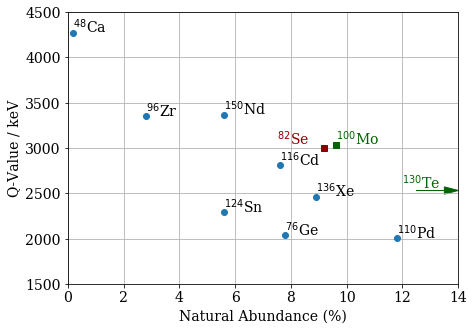

In [4]:
pylab.figure(figsize=(7,5))
pylab.plot(NatAb,QVals,'o')
pylab.plot([SeNatAb],[SeQVal],'s',color='DarkRed')
pylab.plot([MoNatAb],[MoQVal],'s',color='DarkGreen')


pylab.ylim(1500,4500)
pylab.xlim(0,40)
pylab.xlabel("Natural Abundance (%)")
pylab.ylabel("Q-Value / keV")
for i in range(0, len(Names)):
    pylab.text(NatAb[i],QVals[i],Names[i],fontsize=14)
pylab.text(12,2550,r"$^{130}$Te",fontsize=14,color='DarkGreen')
pylab.text(SeNatAb-1.7,SeQVal+50,r"$^{82}$Se",fontsize=14,color='DarkRed')
pylab.text(MoNatAb,MoQVal, "$^{100}$Mo",fontsize=14,color='DarkGreen')


pylab.grid()

pylab.arrow(12.5,2530,1,0,head_width=80, head_length=0.5,color='DarkGreen')

pylab.xlim(0,14)
pylab.savefig("AbundancesEtc.png",dpi=200)

# SeF6 and SF6 Attachment Plots

In [6]:
SF6Central=numpy.loadtxt("./AttachmentData/SF6Central.csv",delimiter=',')
SF6Upper=numpy.loadtxt("./AttachmentData/SF6Upper.csv",delimiter=',')

SeF6Central=numpy.loadtxt("./AttachmentData/SeF6Central.csv",delimiter=',')
SeF6Upper=numpy.loadtxt("./AttachmentData/SeF6Upper.csv",delimiter=',')

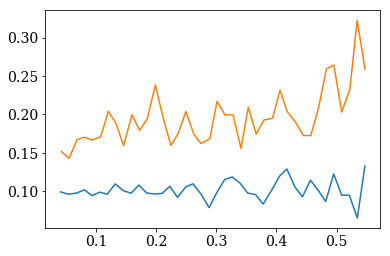

In [7]:
pylab.plot(SF6Central[:,0],(SF6Upper[:,1]-SF6Central[:,1])/SF6Central[:,1])
pylab.plot(SeF6Central[:,0],(SeF6Upper[:,1]-SeF6Central[:,1])/SeF6Central[:,1])

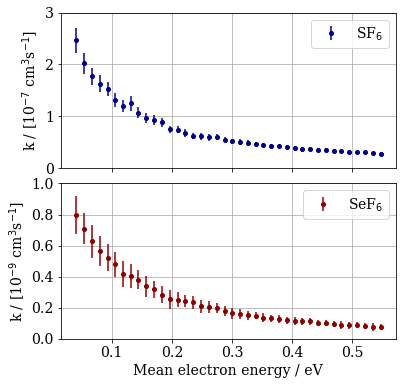

In [8]:
fig,[ax1,ax2]=pylab.subplots(2,1,sharey=False,sharex=True,figsize=(6,6))

ax1.errorbar(SF6Central[:,0],SF6Central[:,1],yerr=(SF6Upper[:,1]-SF6Central[:,1]),color='DarkBlue',fmt='o',markersize=4,label=r'SF$_6$')
ax2.errorbar(SF6Central[:,0],SeF6Central[:,1],yerr=(SeF6Upper[:,1]-SeF6Central[:,1]),color='DarkRed',fmt='o',markersize=4,label=r'SeF$_6$')
ax1.grid()
ax2.grid()
ax1.set_ylim(0,3)
ax2.set_ylim(0,1)
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')


fig.subplots_adjust(hspace=0.1)
ax1.set_ylabel(r"k / [10$^{-7}$ cm$^{3}$s$^{-1}$]")
ax2.set_ylabel(r"k / [10$^{-9}$ cm$^{3}$s$^{-1}$]")
ax2.set_xlabel("Mean electron energy / eV")
pylab.savefig("AttachmentVsEnergy.png",dpi=200)


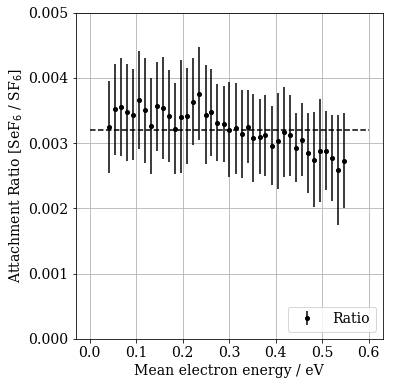

In [9]:
pylab.figure(figsize=(5.5,6))
Ratios=SeF6Central[:,1]/(100*SF6Central[:,1])
Errs=Ratios*((SeF6Upper[:,1]-SeF6Central[:,1])**2/SeF6Central[:,1]**2+(SF6Upper[:,1]-SF6Central[:,1])**2/SF6Central[:,1])**0.5
pylab.errorbar(SF6Central[:,0],Ratios,yerr=Errs,color='black',markersize=4,label='Ratio',fmt='o')
pylab.grid()
pylab.ylabel(r"Attachment Ratio [SeF$_6$ / SF$_6$]")
pylab.xlabel("Mean electron energy / eV")
pylab.ylim(0,0.005)
pylab.legend(loc='lower right')
pylab.plot([0,0.6],[0.0032,0.0032],'--',color='black')
pylab.savefig("AttachmentRatio.png",dpi=200)


#pylab.semilogy()

In [10]:
pylab.average(Ratios)

0.0032233851489116188